<a href="https://colab.research.google.com/github/greeanday/Subject_1_IMU_DATA/blob/main/subject1_2_3_otomatik_analiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
def topla(*args):
    toplam = 0
    for sayi in args:
        toplam += sayi
    return toplam

print(topla(1, 2, 3))

6


In [41]:
data_frame=input("Lütfen istediğiniz subject dosyalarının isimlerini girin  (virgülle ayırın): ").split(",")

Lütfen istediğiniz subject dosyalarının isimlerini girin  (virgülle ayırın): subject101.dat,subject103.dat


In [42]:
print(data_frame)

['subject101.dat', 'subject103.dat']



   Başlatıldı: subject01
Standing heart rate avarage: 103.42590725806451
Running heart rate avarage: 161.338485316847
Rope jumping heart rate avarage: 165.9949152542373


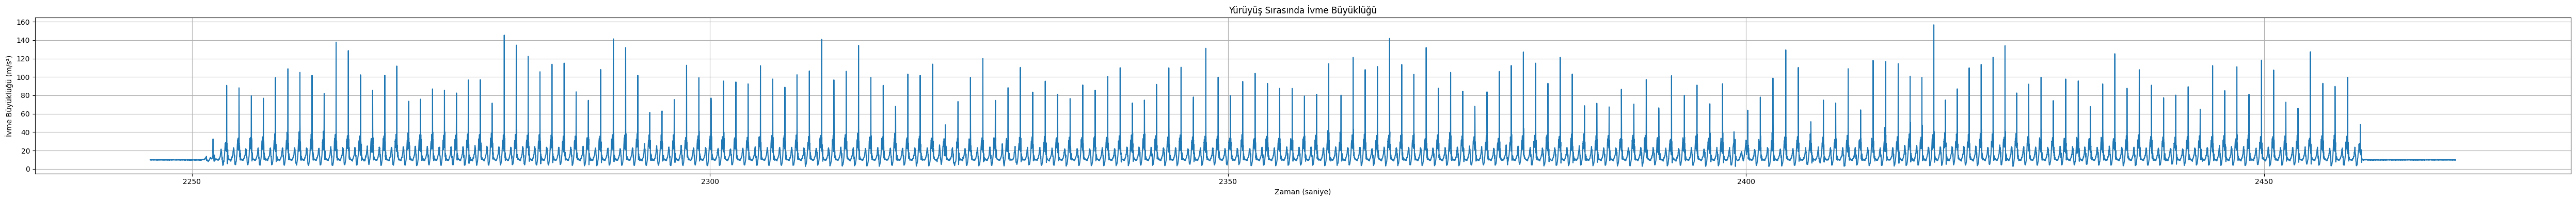

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

energy: 7844430.727448072
Maximum Amplitude: 156.59667319023734 
Max Amplitude Location Index: 17160 
Max Amplitude Time (second): 2418.13 
Minimum Amplitude: 2.746836985407034 
Min Amplitude Location Index: 15571 
Min Amplitude Time (second): 2402.21 
Freedman–Diaconis bin sayısı: 435
Shannon Entropi: 5.9820 bit

   Başlatıldı: subject03
Standing heart rate avarage: 84.42492012779553
Running heart rate avarage: nan
Rope jumping heart rate avarage: nan


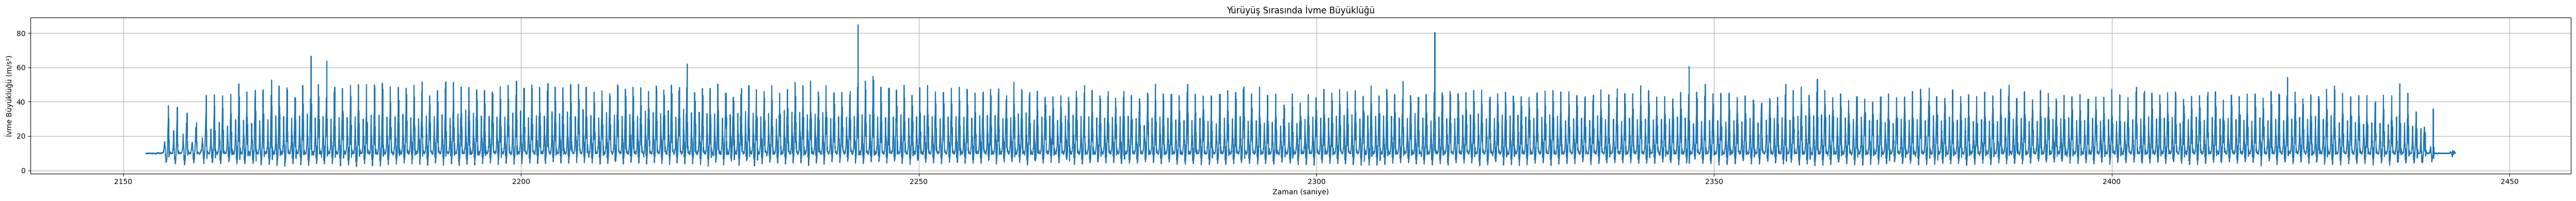

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

energy: 9627265.707562853
Maximum Amplitude: 84.76401797661553 
Max Amplitude Location Index: 8873 
Max Amplitude Time (second): 2242.38 
Minimum Amplitude: 2.2585821039966647 
Min Amplitude Location Index: 2640 
Min Amplitude Time (second): 2179.32 
Freedman–Diaconis bin sayısı: 239
Shannon Entropi: 6.1247 bit


Energy  ShannonEntropy    MaxValue  MaxIndex  MinValue  MinIndex  \
0     38857.009853        4.397160   10.087198     253.0  9.561220     391.0   
1     70984.748641        4.507251   90.808606     338.0  3.863937     301.0   
2    136496.607190        4.076110   88.141788      57.0  4.071261     260.0   
3    161911.372810        3.956404  108.862056     128.0  3.821606     328.0   
4    157526.743814        4.101161  137.797572     192.0  3.892006     160.0   
..             ...             ...         ...       ...       ...       ...   
124  127572.390557        4.161259   49.081758      86.0  3.019159     163.0   
125  107810.033374        4.249496   43.764947     302.0  2.871914     380.0   
126  110395.505240        4.202748   50.363399     107.0  4.255154     286.0   
127   49996.627494        5.223657   35.740882     128.0  4.883467     109.0   
128     608.592889        1.792481   10.157426       2.0  9.883610       0.0   

    subject_name  Activit_yID  
0      subject01            4  
1      subject01            4  
2      subject01            4  
3      subject01            4  
4      subject01            4  
..           ...          ...  
124    subject03            4  
125    subject03            4  
126    subject03            4  
127    subject03            4  
128    subject03            4  

[129 rows x 8 columns]

In [64]:
signal_features(data_frame,4)

In [63]:
def signal_features(data_frame,activityID):
  import pandas as pd
  all_features=[]
  for data in data_frame:
    subject_number=data[-6:-4]
    subject_name= "subject" + subject_number #örneğin subject01

    print("\n" + "="*40)
    print(f"   \033[31mBaşlatıldı: {subject_name}")  # sadece bu satır kırmızı
    print("="*40 +"\033[0m")

    dataFrame=import_data(data)
    heart_rate_avarage(dataFrame)
    magnitude(dataFrame,activityID,subject_name)
    energy_maxValue_minValue_shannon_entropy(dataFrame,activityID)
    feature_df = four_sec_feature_df_subjectName(dataFrame,activityID,subject_name) #her dçngüde oluşan feature_df i aynı zamanda alıyorum ki birleştirebileyim.

    all_features.append(feature_df) #listeye ekledim

  birlesik_feature_df = pd.concat(all_features, ignore_index=True) #döngü sonunda hepsini birleştirdim

  #csv olarak birleştirelim

  birlesik_feature_df.to_csv("birlesik_feature_df.csv" , index=False)

  return birlesik_feature_df


In [15]:
data="subject101.dat"

In [25]:
dataFrame=import_data(data)
heart_rate_avarage(dataFrame)


Standing heart rate avarage: 103.42590725806451
Running heart rate avarage: 161.338485316847
Rope jumping heart rate avarage: 165.9949152542373


(np.float64(103.42590725806451),
 np.float64(161.338485316847),
 np.float64(165.9949152542373))

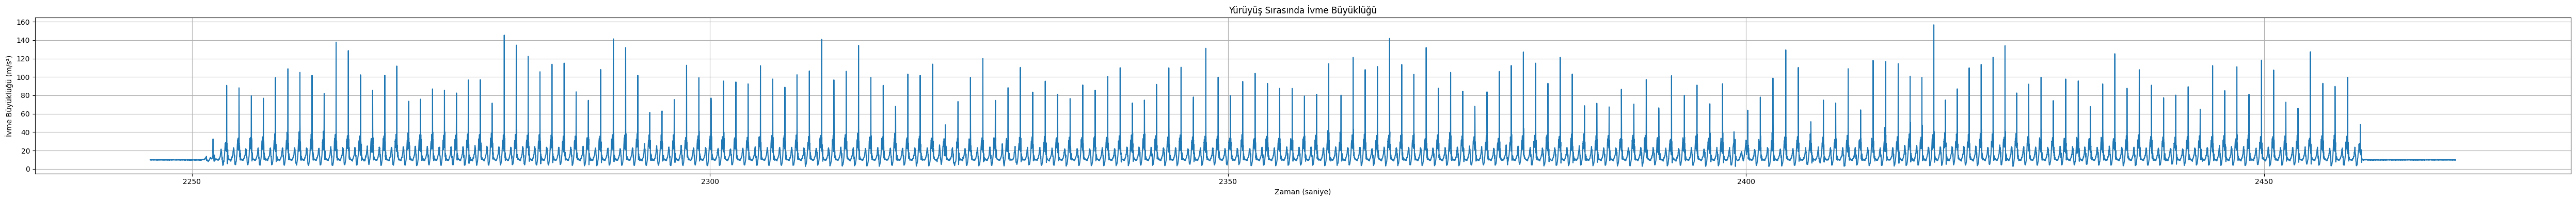

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

223759    9.915730
223760    9.955164
223761    9.772669
223762    9.843736
223763    9.954006
            ...   
246007    9.854254
246008    9.780769
246009    9.741981
246010    9.928877
246011    9.855745
Length: 22185, dtype: float64

In [26]:
magnitude(dataFrame,4)


In [27]:
energy_maxValue_minValue_shannon_entropy(dataFrame,4)


energy: 7844430.727448072
Maximum Amplitude: 156.59667319023734 
Max Amplitude Location Index: 17160 
Max Amplitude Time (second): 2418.13 
Minimum Amplitude: 2.746836985407034 
Min Amplitude Location Index: 15571 
Min Amplitude Time (second): 2402.21 
Freedman–Diaconis bin sayısı: 435
Shannon Entropi: 5.9820 bit


(np.float64(7844430.727448072),
 156.59667319023734,
 2.746836985407034,
 np.float64(5.982042734504913))

In [28]:
four_sec_feature_df_garantici(data,4)

Energy  ShannonEntropy    MaxValue  MaxIndex  MinValue  MinIndex  \
0    38857.009853        4.397160   10.087198     253.0  9.561220     391.0   
1    70984.748641        4.507251   90.808606     338.0  3.863937     301.0   
2   136496.607190        4.076110   88.141788      57.0  4.071261     260.0   
3   161911.372810        3.956404  108.862056     128.0  3.821606     328.0   
4   157526.743814        4.101161  137.797572     192.0  3.892006     160.0   
5   165948.057368        4.079477  111.821684     376.0  3.943762     222.0   
6   142346.099214        4.008248   86.960007     321.0  3.627275     168.0   
7   163693.675398        3.983276   96.964954     378.0  3.810508       3.0   
8   160953.742695        3.948627  145.427312     206.0  4.094513      58.0   
9   177719.913654        3.904756  122.339928      36.0  4.246895     117.0   
10  135407.909686        4.040583  108.024051     334.0  3.467728     178.0   
11  167560.409508        4.009463  141.297706      56.0  3.799823     372.0   
12  140937.292453        3.988870  112.646440     361.0  3.698255     327.0   
13  143337.987050        4.126545   99.068834      80.0  3.598045     163.0   
14  165089.567778        4.036072  112.182470     272.0  3.978185     357.0   
15  139244.655053        4.209874  106.493617     340.0  2.803594     302.0   
16  157850.881659        4.208101  140.785579      59.0  3.163622     257.0   
17  166600.895843        4.052947  134.237096      14.0  2.935180     213.0   
18  143935.931953        4.116814  113.850525     327.0  3.146444     170.0   
19  127289.124724        4.238989   99.399533     289.0  3.355429     370.0   
20  156939.741127        3.940815  119.939965       9.0  3.286046     213.0   
21  125531.647880        4.207143   95.429472     211.0  3.882115     173.0   
22  129553.409317        4.182424   91.261201     171.0  3.134844      12.0   
23  156945.606872        4.044687  110.013597     130.0  3.577132      92.0   
24  148765.149492        4.101640  110.498098     317.0  3.470342     278.0   
25  164582.120910        4.139455  131.071283     156.0  3.824193     118.0   
26  134832.572835        4.093411  103.874088     231.0  3.527401     192.0   
27  132603.596184        4.094156   87.573472      68.0  3.460222      30.0   
28  166163.364873        4.097704  121.172846     372.0  3.562730     100.0   
29  160546.073836        4.112091  141.777454     323.0  3.259011     285.0   
30  168876.547546        4.081449  131.889848     274.0  3.542150     355.0   
31  133110.945519        4.092083  104.867028     110.0  3.525336     189.0   
32  152691.732034        4.100106  112.387758     289.0  4.095939     136.0   
33  171611.528607        4.097237  127.075724       6.0  3.288676     205.0   
34  129552.475829        4.173898  103.110379      78.0  3.513952     278.0   
35  159753.249012        4.129281   97.165962     390.0  2.932375     352.0   
36  125810.233353        4.108432  101.295981     233.0  3.295246     192.0   
37  133392.834256        4.164557   92.620338     325.0  2.820725     163.0   
38  116913.669479        4.121485   78.118006     288.0  2.746837     371.0   
39  153983.936612        4.200628  129.372990     134.0  3.188203      95.0   
40  126281.092810        4.217908  108.923955     333.0  3.020605     294.0   
41  142262.512956        4.156676  117.901766     174.0  3.183129     377.0   
42  190385.262783        3.951541  156.596673     360.0  3.446153     322.0   
43  147991.922634        4.137127  109.847879     299.0  3.619710     378.0   
44  183560.006630        3.942545  133.847087     245.0  2.821521     322.0   
45  137274.071905        4.127628   99.603005     193.0  4.098147     158.0   
46  155382.166425        4.092934   97.698133      30.0  4.122491     346.0   
47  141879.328594        4.121048  125.192372     101.0  3.349138     181.0   
48  136115.848042        4.110667   90.974571      53.0  3.774999     369.0   
49  149896.796171        4.010310  112.314181     243.0  3.90

In [16]:
def import_data(data):
  import pandas as pd
  dataFrame=pd.read_csv(data,sep=" ", header=None)
  dataFrame.columns=["timestamp","activityID","heart_rate"]+[f'col_{i}' for i in range(4,55)]
  return dataFrame

In [20]:
def heart_rate_avarage(dataFrame):
  import pandas as pd

  dataFrame["heart_rate"]=pd.to_numeric(dataFrame["heart_rate"], errors="coerce")
  standing=dataFrame[dataFrame["activityID"]==3]["heart_rate"].dropna()
  running=dataFrame[dataFrame["activityID"]==5]["heart_rate"].dropna()
  jumping=dataFrame[dataFrame["activityID"]==24]["heart_rate"].dropna()
  s_mean = standing.mean()
  r_mean = running.mean()
  j_mean = jumping.mean()
  print("Standing heart rate avarage:", standing.mean())
  print("Running heart rate avarage:", running.mean())
  print("Rope jumping heart rate avarage:", jumping.mean())

  return s_mean, r_mean, j_mean




Sonrasında sadece:

heart_rate_average(dataFrame)
diye fonksiyonu çağırdıysan ama sonucu bir değişkene atamadıysan, dışarıda s_mean tanımlı değildir.

📌 s_mean'in dışarıda tanımlı olması için:

Aşağıdaki gibi return edilen değerleri yakalaman gerekir:

s_mean, r_mean, j_mean = heart_rate_average(dataFrame)
Böylece artık s_mean fonksiyon dışındaki bir değişkendir ✅
Artık şöyle kullanabilirsin:

print("Sadece standing:", s_mean)

In [56]:
!pip install plotly
def magnitude(dataFrame,activityID,subject_name):
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

  dataFrame["col_39"]=pd.to_numeric(dataFrame["col_39"], errors="coerce")
  dataFrame["col_40"]=pd.to_numeric(dataFrame["col_40"], errors="coerce")
  dataFrame["col_41"]=pd.to_numeric(dataFrame["col_41"], errors="coerce")

  walking=dataFrame[dataFrame["activityID"]==activityID]

  xyz = walking[["timestamp","col_39", "col_40", "col_41"]].dropna()

  magnitude = np.sqrt(xyz["col_39"]**2 + xyz["col_40"]**2 + xyz["col_41"]**2)

  zaman=xyz["timestamp"]

  from google.colab import files

  fig, ax = plt.subplots(figsize=(50, 4))  # fig ve ax nesneleri oluşturuluyor
  # 📈 Veriyi çiz
  ax.plot(zaman, magnitude)
  ax.set_title("Yürüyüş Sırasında İvme Büyüklüğü")
  ax.set_xlabel("Zaman (saniye)")
  ax.set_ylabel("İvme Büyüklüğü (m/s²)")
  ax.grid(True)

  # 🧼 Layout'u düzenle
  fig.tight_layout()

  # 💾 Önce kaydet, sonra göster

  name=f"genis_grafik_ {subject_name} .png"
  fig.savefig(name, dpi=300)
  plt.show()  # Opsiyonel – görmek istersen

  # 📥 İndirmek için
  files.download(name)

  import plotly.graph_objects as go
  fig=go.Figure()
  fig.add_trace(go.Scatter(x=zaman, y=magnitude,mode="lines", name="Yürüyüş Sırasında İvme Büyüklüğü-16g" ))

  fig.update_layout(title="Yürüyüş Sırasında İvme Büyüklüğü (Etkileşimli)",xaxis_title="Zaman (seconds)", yaxis_title="İvme Büyüklüğü (m/s²)", hovermode= "x unified")

  fig.show()

  return magnitude









In [22]:
def energy_maxValue_minValue_shannon_entropy(dataFrame,activityID):
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt


  dataFrame["col_39"]=pd.to_numeric(dataFrame["col_39"], errors="coerce")
  dataFrame["col_40"]=pd.to_numeric(dataFrame["col_40"], errors="coerce")
  dataFrame["col_41"]=pd.to_numeric(dataFrame["col_41"], errors="coerce")

  walking=dataFrame[dataFrame["activityID"]==activityID]
  xyz = walking[["timestamp","col_39", "col_40", "col_41"]].dropna()

  magnitude = np.sqrt(xyz["col_39"]**2 + xyz["col_40"]**2 + xyz["col_41"]**2)

  energy=np.sum(magnitude**2)
  print(f"energy: {energy}")


  max_value = np.max(magnitude)
  max_index = np.argmax(magnitude)
  max_value_time= xyz.iloc[max_index]["timestamp"]
  print(f"Maximum Amplitude: {max_value} \nMax Amplitude Location Index: {max_index} \nMax Amplitude Time (second): {max_value_time} ")


  min_value=np.min(magnitude)
  min_index=np.argmin(magnitude)
  min_value_time=xyz.iloc[min_index]["timestamp"]
  print(f"Minimum Amplitude: {min_value} \nMin Amplitude Location Index: {min_index} \nMin Amplitude Time (second): {min_value_time} ")


  from scipy.stats import entropy, iqr
  #IQR (interquartile Range) hesaplama
  data_iqr=iqr(magnitude)

  #bin genişliği hesapla
  bin_width=data_iqr/(len(magnitude)**(1/3))

  #bin sayısını hesapla
  bin_count=int(np.ceil((magnitude.max()- magnitude.min()) / bin_width))

  #histogram hesapla
  counts, _ =np.histogram(magnitude, bins=bin_count, density=True)

  #olasılıklar ve entropi hesapla
  probabilities= counts/np.sum(counts)
  H=entropy(probabilities, base=2)


  print(f"Freedman–Diaconis bin sayısı: {bin_count}")
  print(f"Shannon Entropi: {H:.4f} bit")

  return energy, max_value, min_value, H





In [9]:
def four_sec_feature_df(dataFrame,activityID):
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt


  dataFrame["col_39"]=pd.to_numeric(dataFrame["col_39"], errors="coerce")
  dataFrame["col_40"]=pd.to_numeric(dataFrame["col_40"], errors="coerce")
  dataFrame["col_41"]=pd.to_numeric(dataFrame["col_41"], errors="coerce")

  walking=dataFrame[dataFrame["activityID"]==activityID]
  xyz = walking[["timestamp","col_39", "col_40", "col_41"]].dropna()

  magnitude = np.sqrt(xyz["col_39"]**2 + xyz["col_40"]**2 + xyz["col_41"]**2)


  rows = []
  sampling_rate = 100  # Hz
  segment_length = 4 * sampling_rate  # 4 saniye = 400 örnek

  for i in range(0, len(magnitude), segment_length):
      segment = magnitude.iloc[i:i+segment_length].values  # .iloc kullandık
      if len(segment) < segment_length:
          segment = np.pad(segment, (0, segment_length - len(segment)), constant_values=np.nan)
      rows.append(segment)

  matrix_4sec_segments = np.array(rows)


  import numpy as np
  from scipy.stats import entropy, iqr

  # Özellikleri saklayacağımız liste
  features = []

  # Her pencere için özellikleri hesapla
  for segment in matrix_4sec_segments:
      # NaN'leri filtrele
      segment = segment[~np.isnan(segment)]

      # Enerji: karelerin toplamı
      energy = np.sum(segment**2)

      # Shannon Entropy
      # Frekansları say (Freedman-Diaconis bin sayısı bularak)
      segment_iqr=iqr(segment)
      bin_width=segment_iqr/(len(segment)**(1/3))

      #bin sayısı hesqaplayalım
      bin_count=int(np.ceil((segment.max()-segment.min()) / bin_width))

      #histogram hesaplayalım
      counts, _ =np.histogram(segment,bins=bin_count, density=True)

      #olasılıklar ve entropi hesaplayalım

      probabilities=counts/np.sum(counts)
      shannon_entropy=entropy(probabilities, base=2)



      # Maksimum ve konumu
      max_val = np.max(segment)
      max_idx = np.argmax(segment)

      # Minimum ve konumu
      min_val = np.min(segment)
      min_idx = np.argmin(segment)

      # Özellikleri birleştir ve ekle
      features.append([energy, shannon_entropy, max_val, max_idx, min_val, min_idx])

  # Özellik matrisi olarak numpy array'e çevir
  feature_matrix = np.array(features)

  # Dilersen bir DataFrame'e de çevirebilirsin:
  columns = ['Energy', 'ShannonEntropy', 'MaxValue', 'MaxIndex', 'MinValue', 'MinIndex']
  feature_df = pd.DataFrame(feature_matrix, columns=columns)

  feature_df.to_csv('feature_matrix_DensityTrue.csv', index=True)



In [ ]:
[]

# bunu her bir feature matrixine column ekleyecek şekilde yapmak için data_file_path name eklemeliyim. bunun için deş şöyle yapacağım

In [24]:
def four_sec_feature_df_garantici(data,activityID):
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

  dataFrame=pd.read_csv(data,sep=" ",header=None)

  subject_number=data[-6:-4]
  subject_name= "subject" + subject_number #örneğin subject01

  dataFrame.columns=["timestamp","activityID","heart_rate"]+[f'col_{i}' for i in range(4,55)]

  dataFrame["col_39"]=pd.to_numeric(dataFrame["col_39"], errors="coerce")
  dataFrame["col_40"]=pd.to_numeric(dataFrame["col_40"], errors="coerce")
  dataFrame["col_41"]=pd.to_numeric(dataFrame["col_41"], errors="coerce")

  walking=dataFrame[dataFrame["activityID"]==activityID]
  xyz = walking[["timestamp","col_39", "col_40", "col_41"]].dropna()

  magnitude = np.sqrt(xyz["col_39"]**2 + xyz["col_40"]**2 + xyz["col_41"]**2)


  rows = []
  sampling_rate = 100  # Hz
  segment_length = 4 * sampling_rate  # 4 saniye = 400 örnek

  for i in range(0, len(magnitude), segment_length):
      segment = magnitude.iloc[i:i+segment_length].values  # .iloc kullandık
      if len(segment) < segment_length:
          segment = np.pad(segment, (0, segment_length - len(segment)), constant_values=np.nan)
      rows.append(segment)

  matrix_4sec_segments = np.array(rows)


  from scipy.stats import entropy, iqr

  # Özellikleri saklayacağımız liste
  features = []

  # Her pencere için özellikleri hesapla
  for segment in matrix_4sec_segments:
      # NaN'leri filtrele
      segment = segment[~np.isnan(segment)]

      # Enerji: karelerin toplamı
      energy = np.sum(segment**2)

      # Shannon Entropy
      # Frekansları say (Freedman-Diaconis bin sayısı bularak)
      segment_iqr=iqr(segment)
      bin_width=segment_iqr/(len(segment)**(1/3))

      #bin sayısı hesqaplayalım
      bin_count=int(np.ceil((segment.max()-segment.min()) / bin_width))

      #histogram hesaplayalım
      counts, _ =np.histogram(segment,bins=bin_count, density=True)

      #olasılıklar ve entropi hesaplayalım

      probabilities=counts/np.sum(counts)
      shannon_entropy=entropy(probabilities, base=2)



      # Maksimum ve konumu
      max_val = np.max(segment)
      max_idx = np.argmax(segment)

      # Minimum ve konumu
      min_val = np.min(segment)
      min_idx = np.argmin(segment)

      # Özellikleri birleştir ve ekle
      features.append([energy, shannon_entropy, max_val, max_idx, min_val, min_idx])

  # Özellik matrisi olarak numpy array'e çevir
  feature_matrix = np.array(features)

  # Dilersen bir DataFrame'e de çevirebilirsin:
  columns = ['Energy', 'ShannonEntropy', 'MaxValue', 'MaxIndex', 'MinValue', 'MinIndex']
  feature_df = pd.DataFrame(feature_matrix, columns=columns)

  feature_df["subject_name"] = subject_name
  feature_df["Activit_yID"] = activityID

  feature_df.to_csv('feature_matrix_DensityTrue.csv', index=True)

  return feature_df



In [59]:
def four_sec_feature_df_subjectName(dataFrame,activityID,subject_name):
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt


  dataFrame["col_39"]=pd.to_numeric(dataFrame["col_39"], errors="coerce")
  dataFrame["col_40"]=pd.to_numeric(dataFrame["col_40"], errors="coerce")
  dataFrame["col_41"]=pd.to_numeric(dataFrame["col_41"], errors="coerce")

  walking=dataFrame[dataFrame["activityID"]==activityID]
  xyz = walking[["timestamp","col_39", "col_40", "col_41"]].dropna()

  magnitude = np.sqrt(xyz["col_39"]**2 + xyz["col_40"]**2 + xyz["col_41"]**2)


  rows = []
  sampling_rate = 100  # Hz
  segment_length = 4 * sampling_rate  # 4 saniye = 400 örnek

  for i in range(0, len(magnitude), segment_length):
      segment = magnitude.iloc[i:i+segment_length].values  # .iloc kullandık
      if len(segment) < segment_length:
          segment = np.pad(segment, (0, segment_length - len(segment)), constant_values=np.nan)
      rows.append(segment)

  matrix_4sec_segments = np.array(rows)


  import numpy as np
  from scipy.stats import entropy, iqr

  # Özellikleri saklayacağımız liste
  features = []

  # Her pencere için özellikleri hesapla
  for segment in matrix_4sec_segments:
      # NaN'leri filtrele
      segment = segment[~np.isnan(segment)]

      # Enerji: karelerin toplamı
      energy = np.sum(segment**2)

      # Shannon Entropy
      # Frekansları say (Freedman-Diaconis bin sayısı bularak)
      segment_iqr=iqr(segment)
      bin_width=segment_iqr/(len(segment)**(1/3))

      #bin sayısı hesqaplayalım
      bin_count=int(np.ceil((segment.max()-segment.min()) / bin_width))

      #histogram hesaplayalım
      counts, _ =np.histogram(segment,bins=bin_count, density=True)

      #olasılıklar ve entropi hesaplayalım

      probabilities=counts/np.sum(counts)
      shannon_entropy=entropy(probabilities, base=2)



      # Maksimum ve konumu
      max_val = np.max(segment)
      max_idx = np.argmax(segment)

      # Minimum ve konumu
      min_val = np.min(segment)
      min_idx = np.argmin(segment)

      # Özellikleri birleştir ve ekle
      features.append([energy, shannon_entropy, max_val, max_idx, min_val, min_idx])

  # Özellik matrisi olarak numpy array'e çevir
  feature_matrix = np.array(features)

  # Dilersen bir DataFrame'e de çevirebilirsin:
  columns = ['Energy', 'ShannonEntropy', 'MaxValue', 'MaxIndex', 'MinValue', 'MinIndex']
  feature_df = pd.DataFrame(feature_matrix, columns=columns)

  feature_df["subject_name"] = subject_name
  feature_df["Activit_yID"] = activityID

  filename=f"feature_matrix_DensityTrue_{subject_name}.csv"

  feature_df.to_csv(filename, index=True)

  return feature_df



In [ ]:
def signal_features(data_frame,activityID):
  import pandas as pd
  all_features=[]
  for data in data_frame:
    subject_number=data[-6:-4]
    subject_name= "subject" + subject_number #örneğin subject01

    print("\n" + "="*40)
    print(f"   \033[31mBaşlatıldı: {subject_name}")  # sadece bu satır kırmızı
    print("="*40 +"\033[0m")

    dataFrame=import_data(data)
    heart_rate_avarage(dataFrame)
    magnitude(dataFrame,activityID,subject_name)
    energy_maxValue_minValue_shannon_entropy(dataFrame,activityID)
    feature_df = four_sec_feature_df_subjectName(dataFrame,activityID,subject_name) #her dçngüde oluşan feature_df i aynı zamanda alıyorum ki birleştirebileyim.

    all_features.append(feature_df) #listeye ekledim

  birlesik_feature_df = pd.concat(all_features, ignore_index=True) #döngü sonunda hepsini birleştirdim

  #csv olarak birleştirelim

  birlesik_feature_df.to_csv("birlesik_feature_df.csv" , index=False)

  return birlesik_feature_df


In [ ]:
data_frame=input("Lütfen istediğiniz subject dosyalarının isimlerini girin  (virgülle ayırın): ").split(",")

Lütfen istediğiniz subject dosyalarının isimlerini girin  (virgülle ayırın): subject101.dat,subject103.dat


In [ ]:
print(data_frame)

['subject101.dat', 'subject103.dat']



   Başlatıldı: subject01
Standing heart rate avarage: 103.42590725806451
Running heart rate avarage: 161.338485316847
Rope jumping heart rate avarage: 165.9949152542373


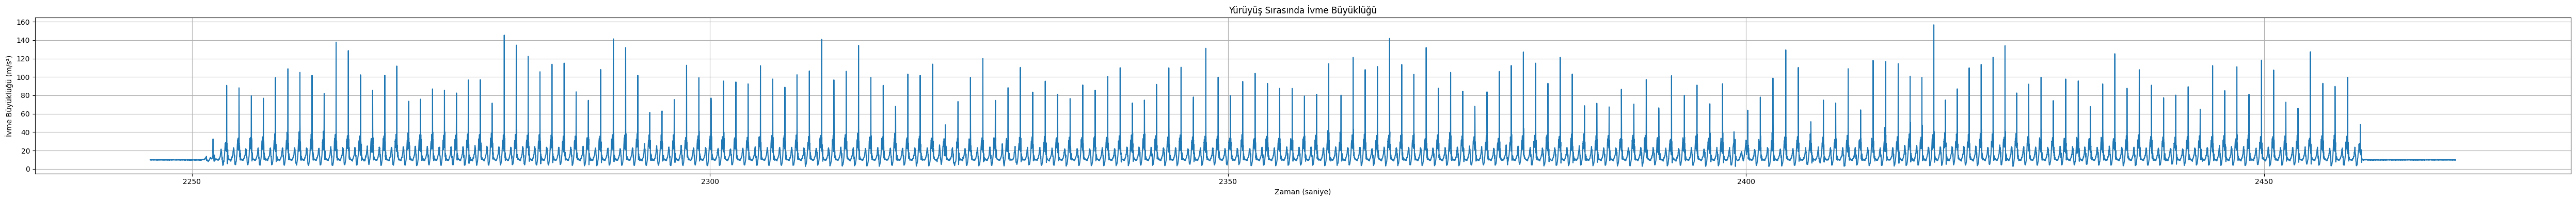

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

energy: 7844430.727448072
Maximum Amplitude: 156.59667319023734 
Max Amplitude Location Index: 17160 
Max Amplitude Time (second): 2418.13 
Minimum Amplitude: 2.746836985407034 
Min Amplitude Location Index: 15571 
Min Amplitude Time (second): 2402.21 
Freedman–Diaconis bin sayısı: 435
Shannon Entropi: 5.9820 bit

   Başlatıldı: subject03
Standing heart rate avarage: 84.42492012779553
Running heart rate avarage: nan
Rope jumping heart rate avarage: nan


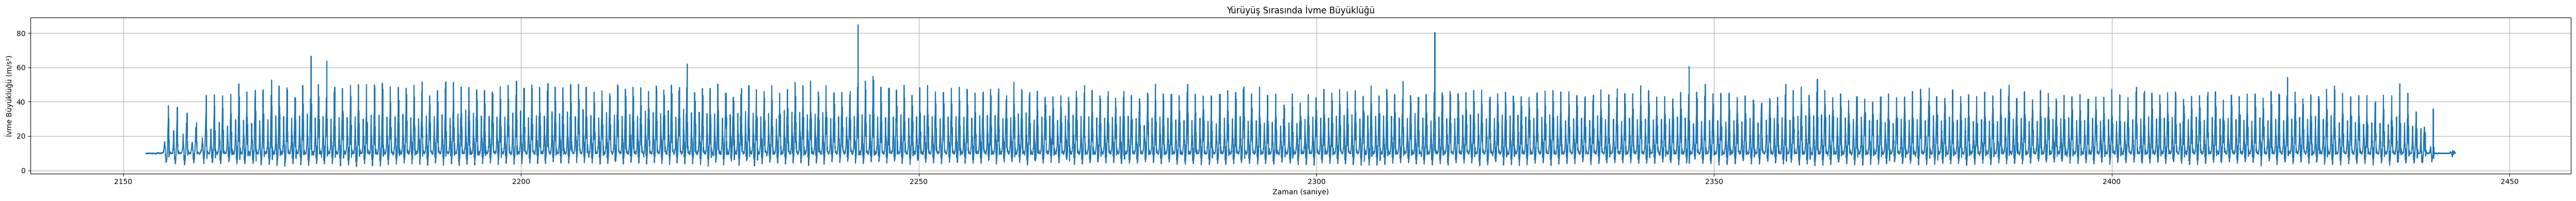

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

energy: 9627265.707562853
Maximum Amplitude: 84.76401797661553 
Max Amplitude Location Index: 8873 
Max Amplitude Time (second): 2242.38 
Minimum Amplitude: 2.2585821039966647 
Min Amplitude Location Index: 2640 
Min Amplitude Time (second): 2179.32 
Freedman–Diaconis bin sayısı: 239
Shannon Entropi: 6.1247 bit


Energy  ShannonEntropy    MaxValue  MaxIndex  MinValue  MinIndex  \
0     38857.009853        4.397160   10.087198     253.0  9.561220     391.0   
1     70984.748641        4.507251   90.808606     338.0  3.863937     301.0   
2    136496.607190        4.076110   88.141788      57.0  4.071261     260.0   
3    161911.372810        3.956404  108.862056     128.0  3.821606     328.0   
4    157526.743814        4.101161  137.797572     192.0  3.892006     160.0   
..             ...             ...         ...       ...       ...       ...   
124  127572.390557        4.161259   49.081758      86.0  3.019159     163.0   
125  107810.033374        4.249496   43.764947     302.0  2.871914     380.0   
126  110395.505240        4.202748   50.363399     107.0  4.255154     286.0   
127   49996.627494        5.223657   35.740882     128.0  4.883467     109.0   
128     608.592889        1.792481   10.157426       2.0  9.883610       0.0   

    subject_name  Activit_yID  
0      subject01            4  
1      subject01            4  
2      subject01            4  
3      subject01            4  
4      subject01            4  
..           ...          ...  
124    subject03            4  
125    subject03            4  
126    subject03            4  
127    subject03            4  
128    subject03            4  

[129 rows x 8 columns]

In [ ]:
signal_features(data_frame,4)